In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

#sklearn.preprocessing 내 다양한 re-scaling 방법
#scale(X): 기본 스케일. 평균과 표준편차 사용
#robust_scale(X): 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
#minmax_scale(X): 최대/최소값이 각각 1, 0이 되도록 스케일링
#maxabs_scale(X): 최대절대값과 0이 각각 1, 0이 되도록 스케일링

In [2]:
# set seed for reproducibility
np.random.seed(0) ##시드 값을 0으로 설정해서 고정된 난수가 나올 수 있게 도와줌

In [3]:
#re-scaling 방법에 따라 값이 어떻게 변환되는지 간단히 살펴보기
x = (np.arange(9, dtype=np.float) - 3).reshape(-1, 1) ##0부터 시작하는 배열에 -3을 한 값들 9개 만들기
x = np.vstack([x, [20]])  # outlier ## 9개 행의 x와 x값 20을 연결
df1 = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]), 
                  columns=["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)", "maxabs_scale(x)"]) ## 칼럼들을 옆으로 연결

In [4]:
df1 

x  scale(x)  robust_scale(x)  minmax_scale(x)  maxabs_scale(x)
0  -3.0 -0.950995        -1.000000         0.000000            -0.15
1  -2.0 -0.789809        -0.777778         0.043478            -0.10
2  -1.0 -0.628624        -0.555556         0.086957            -0.05
3   0.0 -0.467438        -0.333333         0.130435             0.00
4   1.0 -0.306253        -0.111111         0.173913             0.05
5   2.0 -0.145067         0.111111         0.217391             0.10
6   3.0  0.016119         0.333333         0.260870             0.15
7   4.0  0.177304         0.555556         0.304348             0.20
8   5.0  0.338490         0.777778         0.347826             0.25
9  20.0  2.756273         4.111111         1.000000             1.00

In [ ]:
##아웃라이어의 영향을 얼만큼 받느냐의 차이에 따라 scale방법을 다르게 사용
##minmax_scale(0~1) maxabs_scale절댓값기준이라 (-1~1)
##아웃라이어의 영향이 크다면 robust_scale 쓰는것이 가장 효과적

Min-Max Scaling

In [5]:
#서로 다른 분포의 랜덤 데이터 생성
df2 = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000), ##카이스퀘어 분포로부터 랜덤데이터
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40, ##베타분포로부터 랜덤데이터
    # no skew
    'x3': np.random.normal(50, 3, 1000) ##정규분포로부터 랜덤데이터
})

In [6]:
#정규화
scaler = preprocessing.MinMaxScaler() ##데이터 포인트간의 거리가 중요하 분석에서 주로 사용
scaled_df2 = scaler.fit_transform(df2) ##MinMax스케일링으로 정규화 ##numpy array형태로 나옴 
scaled_df2 = pd.DataFrame(scaled_df2, columns=['x1', 'x2', 'x3'])

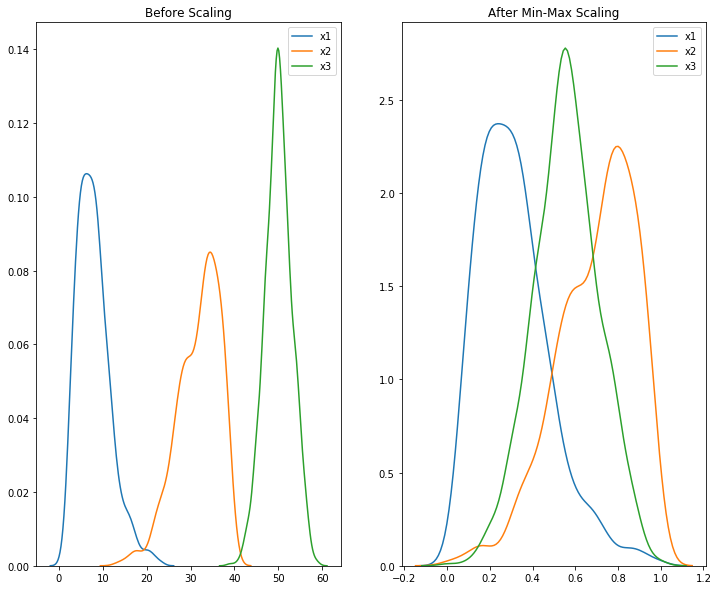

In [7]:
#정규화 전후 결과 비교
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 10))
ax1.set_title('Before Scaling')
sns.kdeplot(df2['x1'], ax=ax1)
sns.kdeplot(df2['x2'], ax=ax1)
sns.kdeplot(df2['x3'], ax=ax1)   ##ax1에 스케일링 전 x1,x2,x3 분포 그래프로 만들기
ax2.set_title('After Min-Max Scaling') 
sns.kdeplot(scaled_df2['x1'], ax=ax2)
sns.kdeplot(scaled_df2['x2'], ax=ax2)
sns.kdeplot(scaled_df2['x3'], ax=ax2)   ##ax2에 스케일링 후 x1,x2,x3 분포 그래프로 만들기
plt.show()
## Scailing이후로 x의 범위를 공통으로 갖게 되어 비교가 용이해짐

Standardizing

In [8]:
#서로 다른 정규분포를 따르는 랜덤 데이터 생성
df3 = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

In [9]:
#정규화
scaler = preprocessing.StandardScaler() ## 평균0,분산1인 가우시안 정규 분포를 가진 값으로 스케일
scaled_df3 = scaler.fit_transform(df3) ##기본 스케일링으로 정규화
scaled_df3 = pd.DataFrame(scaled_df3, columns=['x1', 'x2', 'x3']) 

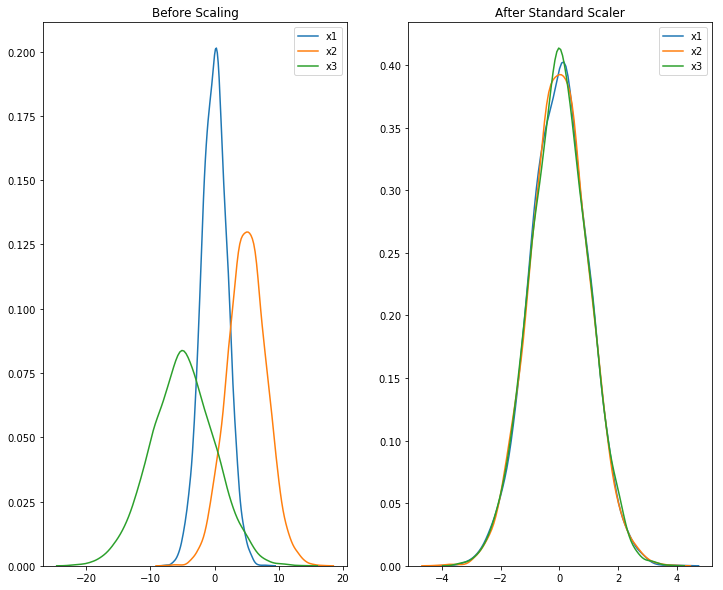

In [10]:
#정규화 전후 결과 비교
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 10))

ax1.set_title('Before Scaling')
sns.kdeplot(df3['x1'], ax=ax1)
sns.kdeplot(df3['x2'], ax=ax1)
sns.kdeplot(df3['x3'], ax=ax1)   ##ax1에 스케일링 전 x1,x2,x3 분포 그래프로 만들기
ax2.set_title('After Standard Scaler') 
sns.kdeplot(scaled_df3['x1'], ax=ax2)
sns.kdeplot(scaled_df3['x2'], ax=ax2)
sns.kdeplot(scaled_df3['x3'], ax=ax2)   ##ax2에 스케일링 후 x1,x2,x3 분포 그래프로 만들기
plt.show()
## 평균/분산을 맞춰 분포가 매우 유사하게 스케일링됨